# DEMO 4

Creating the RSI-Indicator

In [2]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
historical_prices = func_lib.createHistPrices()
list_of_momentums = [1]
total_returns     = func_lib.computingReturns(historical_prices, list_of_momentums)

In [ ]:
def calculate_rsi(returns, window=14):        

    return rsi

In [8]:
returns = total_returns['1_d_returns']
returns = returns[returns.index.get_level_values(0)=='AAPL']

In [10]:
window = 2

In [12]:
gain = returns[returns>0].dropna().rolling(window=window).mean()
gain.name = 'gain'
loss = returns[returns<0].dropna().rolling(window=window).mean()
loss.name = 'loss'

In [14]:
returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')
returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')

In [16]:
returns.head()

1_d_returns      gain      loss
Ticker Date                                       
AAPL   2000-01-04    -0.084310       NaN       NaN
       2000-01-05     0.014633       NaN       NaN
       2000-01-06    -0.086538       NaN -0.085424
       2000-01-07     0.047369  0.031001       NaN
       2000-01-10    -0.017588       NaN -0.052063

In [18]:
returns = returns.ffill()
returns.dropna(inplace=True)

In [20]:
ratio = returns['gain']/abs(returns['loss'])
rsi = 100 - (100 / (1 + ratio))

In [22]:
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [24]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [26]:
total_returns.head()

F_1_d_returns  1_d_returns  RSI
Ticker Date                                       
A      2000-01-04      -0.062030    -0.076389  NaN
       2000-01-05      -0.038076    -0.062030  NaN
       2000-01-06       0.083333    -0.038076  NaN
       2000-01-07       0.060577     0.083333  NaN
       2000-01-10      -0.013599     0.060577  NaN

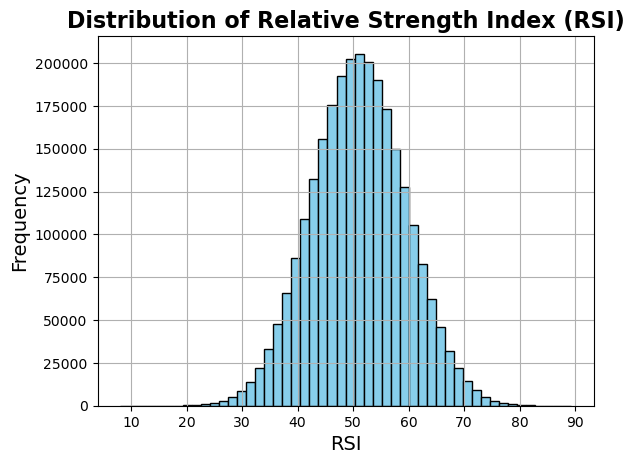

In [28]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True) 
plt.show()

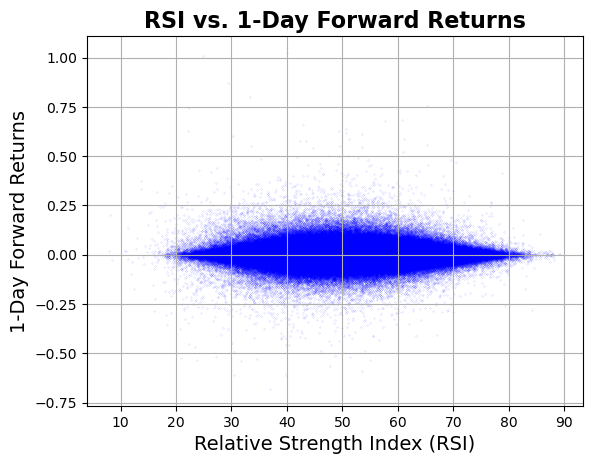

In [30]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)
plt.show()

In [32]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

,F_1_d_returns,RSI
F_1_d_returns,1.000000,-0.004344
RSI,-0.004344,1.000000


<Axes: xlabel='Quantiles'>

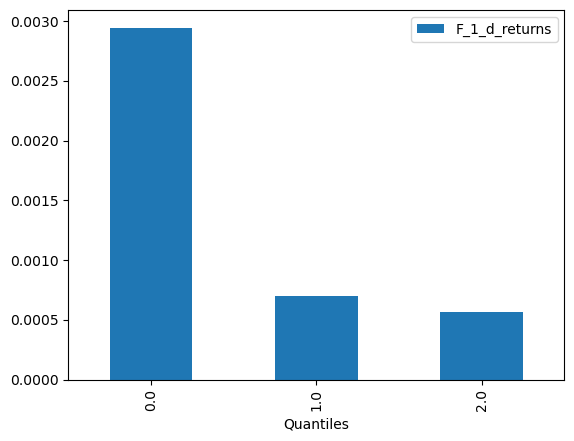

In [34]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

In [36]:
total_returns[total_returns['RSI']<30].describe()

,F_1_d_returns,1_d_returns,RSI,Quantiles
count,15733.000000,15733.000000,15733.000000,15733.0
mean,0.002945,-0.015346,27.264891,0.0
std,0.044308,0.049164,2.535427,0.0
min,-0.531402,-0.680525,8.007049,0.0
25%,-0.010113,-0.020280,26.140024,0.0
50%,0.001411,-0.002036,28.013738,0.0
75%,0.013576,0.005463,29.167722,0.0
max,1.010100,0.350952,29.999488,0.0
